In [1]:
import pandas as pd
import duckdb
import matplotlib.pyplot as plt

In [2]:
conn = duckdb.connect('dados_igreja.db')

In [3]:
camisetas_umademp = pd.read_excel('./dados/camisetas_umademp.xlsx')
camisetas_umademp

,Carimbo de data/hora,Nome completo,De qual igreja você é?,Camiseta feminina (Baby Look) ou camiseta masculina?,Tamanhos (largura x comprimento),Tamanhos (Largura x Comprimento)2
0,2025-02-12 18:21:25.012,Lucas,Terra Preta (Setor),Masculina,NaN,GG (59x76)
1,2025-02-12 18:22:51.700,Gabriel,Terra Preta (Setor),Masculina,NaN,GG (59x76)
2,2025-02-12 18:59:05.650,Gerson,Terra Preta (Setor),Masculina,NaN,M (53x69)
3,2025-02-12 19:14:55.485,Amanda,Terra Preta (Setor),Feminina (Baby look),M (44x62),NaN
4,2025-02-12 19:23:54.807,Matheus,Corumbá (Congregação),Masculina,NaN,G (56x72)
5,2025-02-12 19:53:53.491,Israel,Terra Preta (Setor),Masculina,NaN,GG (59x76)
6,2025-02-12 20:27:23.430,Jaqueline,Terra Preta (Setor),Feminina (Baby look),P (42x60),NaN
7,2025-02-12 21:13:15.799,Ellen,Terra Preta (Setor),Masculina,NaN,M (53x69)
8,2025-02-12 21:40:55.950,Juliane,Terra Preta (Setor),Feminina (Baby look),M (44x62),NaN
9,2025-02-14 14:45:07.059,Yasmin,Terra Preta (Setor),Feminina (Baby look),G (47x66),NaN


In [4]:
# Renomeando as colunas
camisetas_umademp.rename(columns={
    'Tamanhos (largura x comprimento)': 'tamanho_feminino',
    'Tamanhos (Largura x Comprimento)2': 'tamanho_masculino',
    'Carimbo de data/hora': 'data_hora',
    'Nome completo': 'nome',
    'De qual igreja você é?': 'qual_igreja',
    'Camiseta feminina (Baby Look) ou camiseta masculina?': 'genero_camiseta'
}, inplace=True)

In [5]:
# Substituir valores nulos por string vazia
camisetas_umademp2 = camisetas_umademp.fillna(" ")

In [6]:
camisetas_umademp2

,data_hora,nome,qual_igreja,genero_camiseta,tamanho_feminino,tamanho_masculino
0,2025-02-12 18:21:25.012,Lucas,Terra Preta (Setor),Masculina,,GG (59x76)
1,2025-02-12 18:22:51.700,Gabriel,Terra Preta (Setor),Masculina,,GG (59x76)
2,2025-02-12 18:59:05.650,Gerson,Terra Preta (Setor),Masculina,,M (53x69)
3,2025-02-12 19:14:55.485,Amanda,Terra Preta (Setor),Feminina (Baby look),M (44x62),
4,2025-02-12 19:23:54.807,Matheus,Corumbá (Congregação),Masculina,,G (56x72)
5,2025-02-12 19:53:53.491,Israel,Terra Preta (Setor),Masculina,,GG (59x76)
6,2025-02-12 20:27:23.430,Jaqueline,Terra Preta (Setor),Feminina (Baby look),P (42x60),
7,2025-02-12 21:13:15.799,Ellen,Terra Preta (Setor),Masculina,,M (53x69)
8,2025-02-12 21:40:55.950,Juliane,Terra Preta (Setor),Feminina (Baby look),M (44x62),
9,2025-02-14 14:45:07.059,Yasmin,Terra Preta (Setor),Feminina (Baby look),G (47x66),


In [7]:
conn.execute("DROP TABLE IF EXISTS camisetas_umademp2")  # Remove a tabela antiga

In [8]:
conn.register('temp_camisetas', camisetas_umademp2)  # Registra o DataFrame como uma tabela temporária
conn.execute("CREATE TABLE camisetas_umademp2 AS SELECT * FROM temp_camisetas")  # Cria a tabela a partir da temporária

In [9]:
# Verificar se a nova tabela foi criada corretamente
execute_umademp = conn.execute("SELECT * FROM camisetas_umademp2").fetchall()
df_umademp = pd.DataFrame(execute_umademp, columns=camisetas_umademp.columns)
df_umademp

,data_hora,nome,qual_igreja,genero_camiseta,tamanho_feminino,tamanho_masculino
0,2025-02-12 18:21:25.012,Lucas,Terra Preta (Setor),Masculina,,GG (59x76)
1,2025-02-12 18:22:51.700,Gabriel,Terra Preta (Setor),Masculina,,GG (59x76)
2,2025-02-12 18:59:05.650,Gerson,Terra Preta (Setor),Masculina,,M (53x69)
3,2025-02-12 19:14:55.485,Amanda,Terra Preta (Setor),Feminina (Baby look),M (44x62),
4,2025-02-12 19:23:54.807,Matheus,Corumbá (Congregação),Masculina,,G (56x72)
5,2025-02-12 19:53:53.491,Israel,Terra Preta (Setor),Masculina,,GG (59x76)
6,2025-02-12 20:27:23.430,Jaqueline,Terra Preta (Setor),Feminina (Baby look),P (42x60),
7,2025-02-12 21:13:15.799,Ellen,Terra Preta (Setor),Masculina,,M (53x69)
8,2025-02-12 21:40:55.950,Juliane,Terra Preta (Setor),Feminina (Baby look),M (44x62),
9,2025-02-14 14:45:07.059,Yasmin,Terra Preta (Setor),Feminina (Baby look),G (47x66),


In [10]:
# Consultar a quantidade total de camisetas por igreja
df_igrejas = conn.execute('''
    SELECT "qual_igreja", COUNT(*) as quantidade
    FROM camisetas_umademp2
    GROUP BY "qual_igreja"
''').fetchdf()
df_igrejas

,qual_igreja,quantidade
0,Bela Vista (Congregação),1
1,Gibeon (Congregação),4
2,Corumbá (Congregação),3
3,Terra Preta (Setor),13


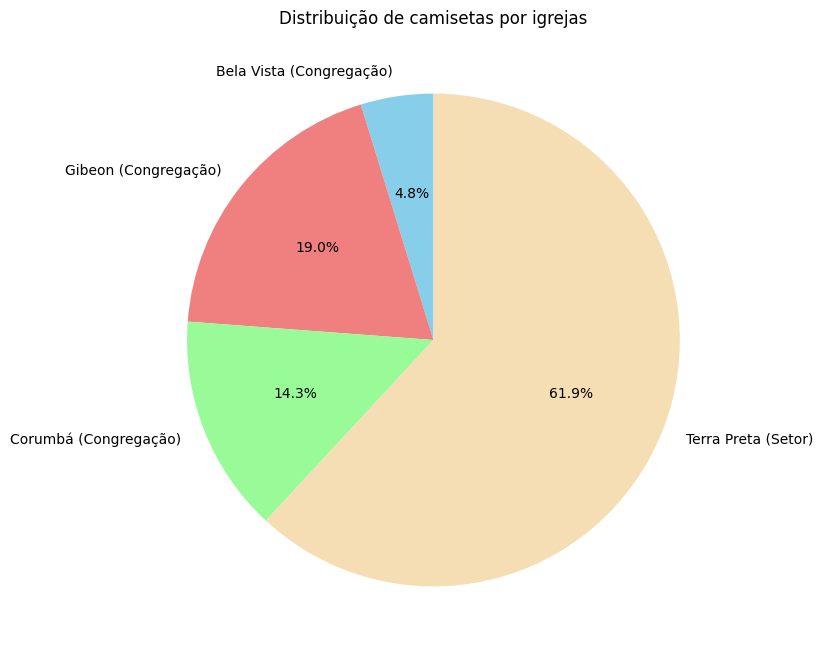

In [11]:
plt.figure(figsize=(8, 8))
plt.pie(df_igrejas["quantidade"], labels=df_igrejas["qual_igreja"], autopct="%1.1f%%", startangle=90, colors=['skyblue', 'lightcoral', 'palegreen', 'wheat'])
plt.title("Distribuição de camisetas por igrejas")
plt.show()

In [12]:
# Consultar a quantidade de camisetas masculinas e femininas
df_genero = conn.execute('''
    SELECT "genero_camiseta", COUNT(*) as quantidade
    FROM camisetas_umademp
    GROUP BY "genero_camiseta"
''').fetchdf()
df_genero

,genero_camiseta,quantidade
0,Feminina (Baby look),11
1,Masculina,10


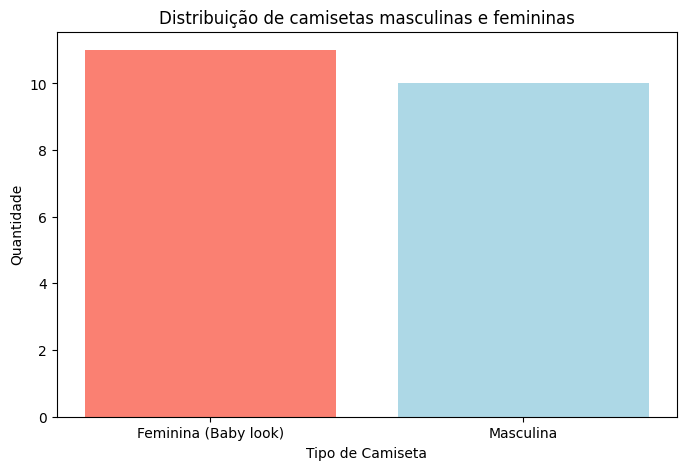

In [13]:
plt.figure(figsize=(8, 5))
plt.bar(df_genero["genero_camiseta"], df_genero["quantidade"], color=['salmon', 'lightblue'])
plt.xlabel("Tipo de Camiseta")
plt.ylabel("Quantidade")
plt.title("Distribuição de camisetas masculinas e femininas")
plt.show()

In [14]:
# Consultar a distribuição de camisetas femininas
df_feminino = conn.execute('''
    SELECT tamanho_feminino, COUNT(*) as quantidade
    FROM camisetas_umademp2
    WHERE TRIM(genero_camiseta) = 'Feminina (Baby look)'
    GROUP BY tamanho_feminino
''').fetchdf()

df_feminino

,tamanho_feminino,quantidade
0,M (44x62),4
1,P (42x60),3
2,G (47x66),4


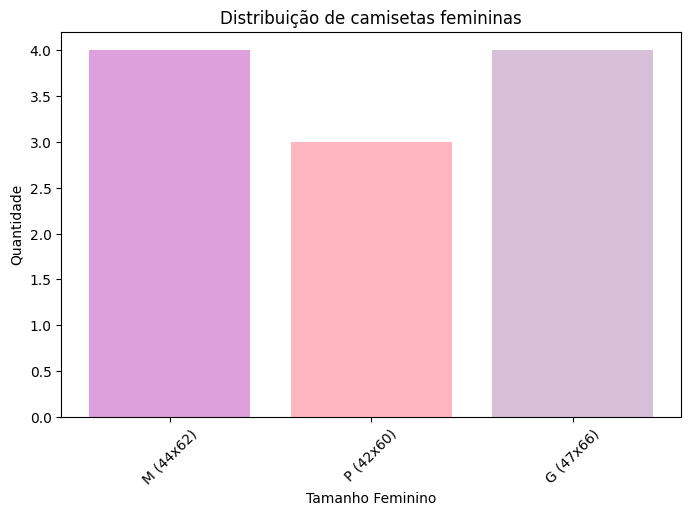

In [15]:
plt.figure(figsize=(8, 5))
plt.bar(df_feminino["tamanho_feminino"], df_feminino["quantidade"], color=['plum', 'lightpink', 'thistle'])
plt.xlabel("Tamanho Feminino")
plt.ylabel("Quantidade")
plt.title("Distribuição de camisetas femininas")
plt.xticks(rotation=45)
plt.show()

In [16]:
# Consultar a distribuição de camisetas masculinas
df_masculino = conn.execute('''
    SELECT "tamanho_masculino", COUNT(*) as quantidade
    FROM camisetas_umademp2
    WHERE "genero_camiseta" = 'Masculina'
    GROUP BY "tamanho_masculino"
''').fetchdf()
df_masculino

,tamanho_masculino,quantidade
0,M (53x69),2
1,G1 (64x80),1
2,G (56x72),2
3,P (50x66),1
4,GG (59x76),3
5,G3 (68x82),1


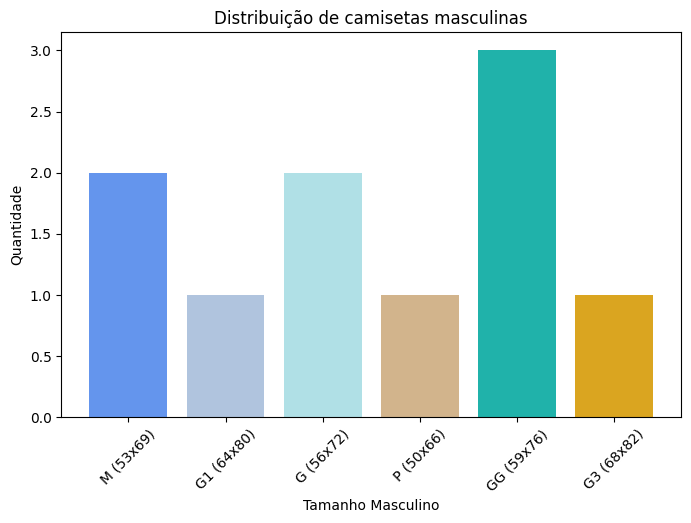

In [17]:
plt.figure(figsize=(8, 5))
plt.bar(df_masculino["tamanho_masculino"], df_masculino["quantidade"], color=['cornflowerblue', 'lightsteelblue', 'powderblue', 'tan', 'lightseagreen', 'goldenrod'])
plt.xlabel("Tamanho Masculino")
plt.ylabel("Quantidade")
plt.title("Distribuição de camisetas masculinas")
plt.xticks(rotation=45)
plt.show()